In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv("hotel_bookings.csv")

In [ ]:
df

,index,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0,Resort Hotel,0,342,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,01-07-15
1,1,Resort Hotel,0,737,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,01-07-15
2,2,Resort Hotel,0,7,2015,July,27,1,0,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,02-07-15
3,3,Resort Hotel,0,13,2015,July,27,1,0,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,02-07-15
4,4,Resort Hotel,0,14,2015,July,27,1,0,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,03-07-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,119385,City Hotel,0,23,2017,August,35,30,2,5,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,06-09-17
119386,119386,City Hotel,0,102,2017,August,35,31,2,5,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,07-09-17
119387,119387,City Hotel,0,34,2017,August,35,31,2,5,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,07-09-17
119388,119388,City Hotel,0,109,2017,August,35,31,2,5,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,07-09-17


In [ ]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

<ipython-input-4-54dd7cc68f7f>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])


In [ ]:
df['reservation_status_date']

0        2015-01-07
1        2015-01-07
2        2015-02-07
3        2015-02-07
4        2015-03-07
            ...    
119385   2017-06-09
119386   2017-07-09
119387   2017-07-09
119388   2017-07-09
119389   2017-07-09
Name: reservation_status_date, Length: 119390, dtype: datetime64[ns]

In [ ]:
df['children'].fillna(0, inplace=True)

In [ ]:
df['country'].fillna('Unknown', inplace=True)
df['agent'].fillna(0, inplace=True)
df['company'].fillna(0, inplace=True)

In [ ]:
df['booking_month'] = df['reservation_status_date'].dt.month

In [ ]:
df['booking_day_of_week'] = df['reservation_status_date'].dt.dayofweek
df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

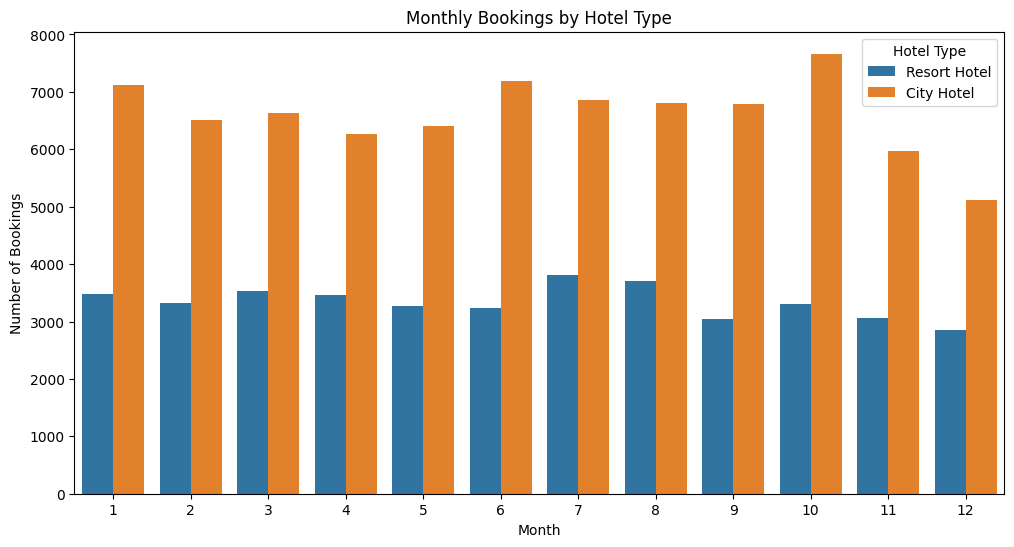

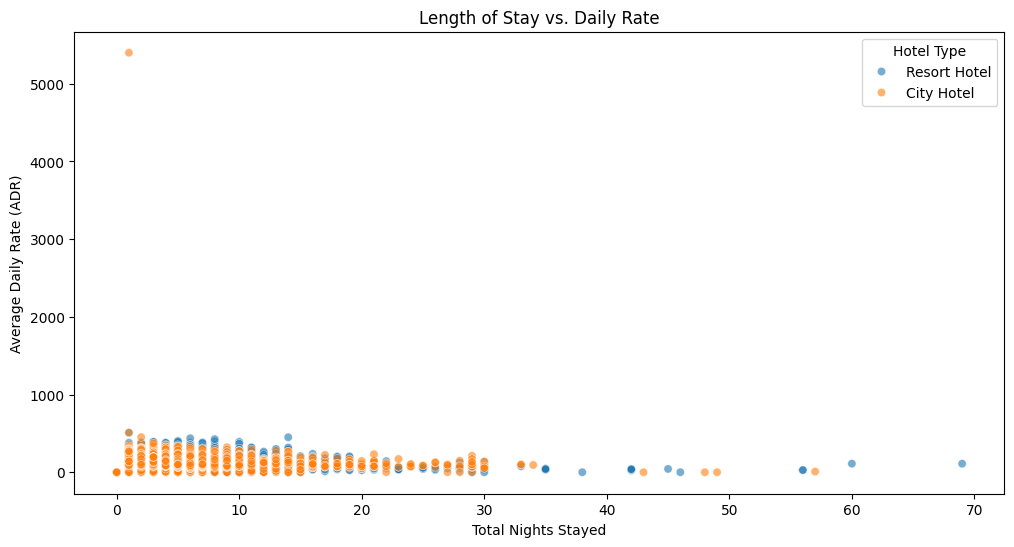

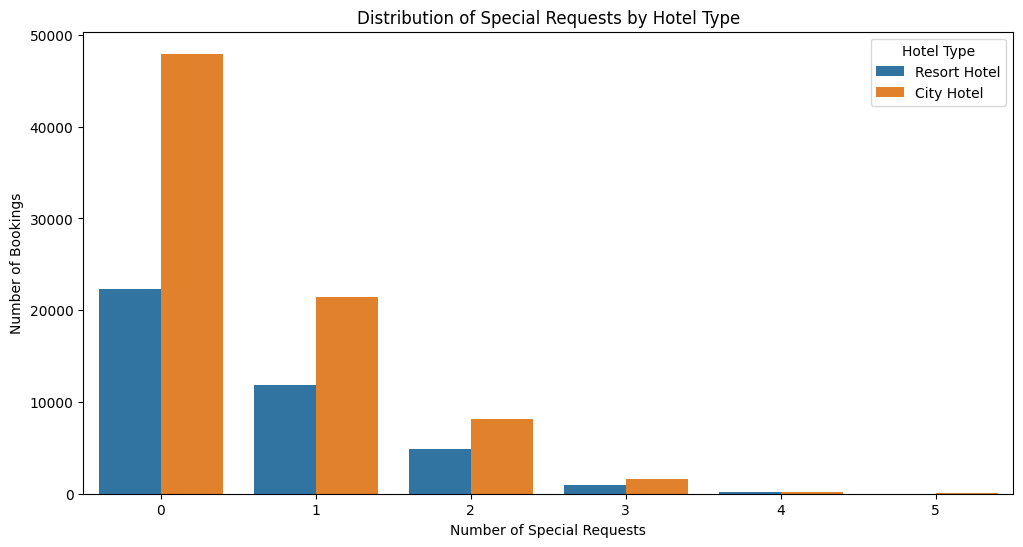

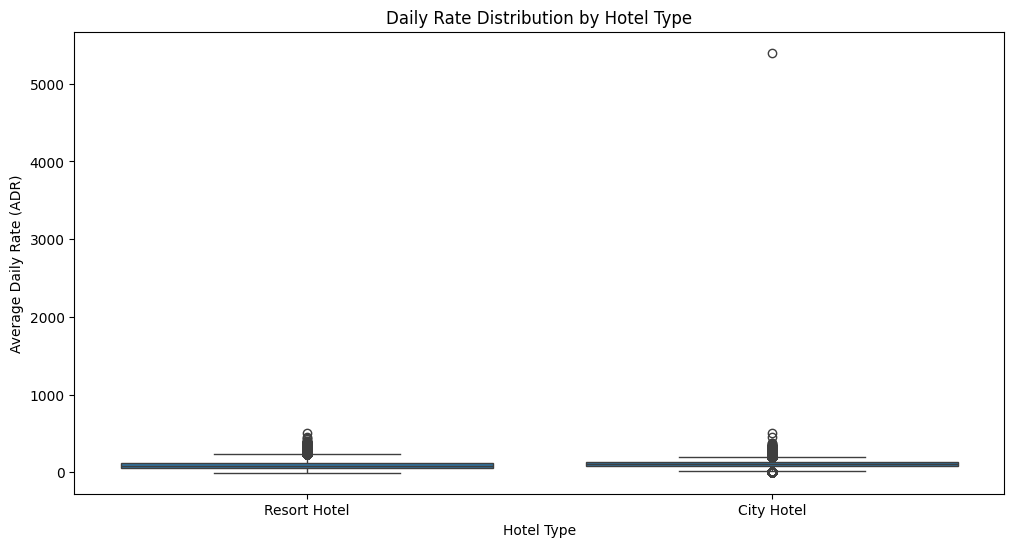

ValueError: could not convert string to float: 'Resort Hotel'

<Figure size 1200x600 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot seasonal trends in bookings
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='booking_month', hue='hotel')
plt.title('Monthly Bookings by Hotel Type')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.legend(title='Hotel Type')
plt.show()

# Length of stay vs. daily rate
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='total_nights', y='adr', hue='hotel', alpha=0.6)
plt.title('Length of Stay vs. Daily Rate')
plt.xlabel('Total Nights Stayed')
plt.ylabel('Average Daily Rate (ADR)')
plt.legend(title='Hotel Type')
plt.show()

# Special requests distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='total_of_special_requests', hue='hotel')
plt.title('Distribution of Special Requests by Hotel Type')
plt.xlabel('Number of Special Requests')
plt.ylabel('Number of Bookings')
plt.legend(title='Hotel Type')
plt.show()

# Comparison of city hotels vs. resort hotels
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='hotel', y='adr')
plt.title('Daily Rate Distribution by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Average Daily Rate (ADR)')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 6))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()
